<a href="https://colab.research.google.com/github/SmrutiNIT/PythonBasics-May-29-Batch/blob/main/Assignment_04_Simple_Linear_Regression_Salary_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
import statsmodels.formula.api as smf

In [2]:
#Import the dataset
sal = pd.read_csv("/content/Salary_Data (3).csv")

In [3]:
#Check the data
sal.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [4]:
#Rename Column
sal = sal.rename(columns={"Salary":"hike","YearsExperience":"years"})
sal.head(5)

,years,hike
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


# Perform EDA on data (Outlier, Missing Values)

#Exploratory Data Analysis
1.Check for the null Values in dataset.
2.Check for the outlier in dataset

In [6]:
# Check for Null Data - No Null values
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   years   30 non-null     float64
 1   hike    30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [7]:
sal.describe()

,years,hike
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


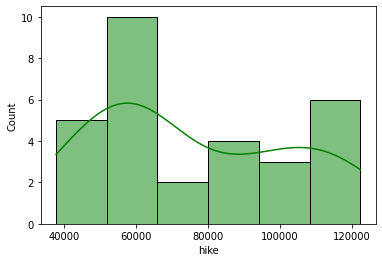

In [8]:
#Plot Histogram to view Distribution of data field ( Univariate)
sns.histplot(sal["hike"], color ='green',kde=True)

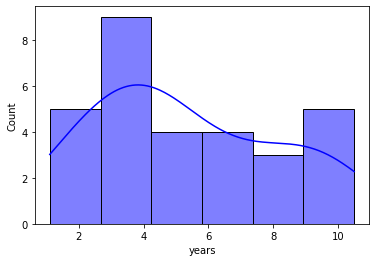

In [9]:
#Plot Histogram to view Distribution of data field ( Univariate) 
sns.histplot(sal["years"], color ='blue',kde=True)

#Outlier Identification

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


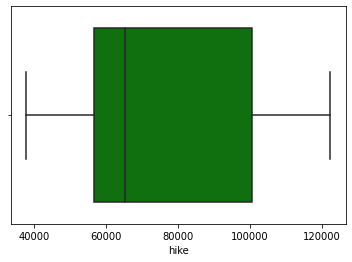

In [10]:
#Use BoxPlot to Identify any outlier in data
sns.boxplot(sal["hike"], color ='green')
# No Outlier found based on the boxplot analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


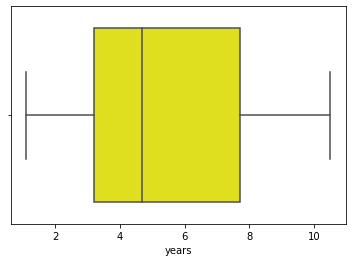

In [11]:
sns.boxplot(sal["years"], color ='yellow')
# No Outlier found based on the boxplot analysis

#Apply Simple linear regression with OLS to create different regression model

Model -1 - Vanilla Model ( No Transformation) - y = ax+b

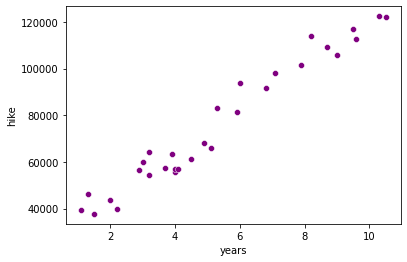

In [12]:
#Check the relation between Variable by Scatter Plot & Correlation Coefficient.
sns.scatterplot(y="hike",x="years",data=sal, color = "purple" )
#Relation Type = Linear
#Direction - Positive Correlation
#Strength -Can't Comment

In [13]:
# Finding the Correlation Coefficient (R) for the relation
# R tells the magnitude of strength of relation between y & x

In [14]:
np.corrcoef(sal["years"],sal["hike"])
# R value is above 0.85 means Correlation strength is High.

array([[1.        , 0.97824162],
       [0.97824162, 1.        ]])

In [16]:
#Using OLS & fitting model on data
import statsmodels.formula.api as smf
model1= smf.ols('hike~years',data = sal).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   hike   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sat, 06 Aug 2022   Prob (F-statistic):           1.14e-20
Time:                        05:47:03   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
years       9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

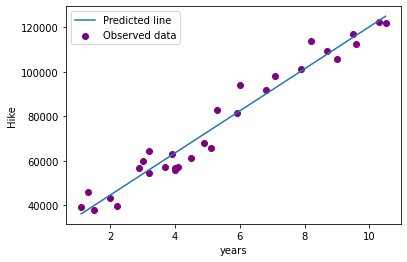

In [17]:
# Prediction Regression Line Model1
pred1 = model1.predict(pd.DataFrame(sal['years']))
plt.scatter(x="years",y="hike",data=sal, color = "purple" )
plt.plot(sal['years'],pred1)
plt.legend(['Predicted line', 'Observed data'])
plt.xlabel('years')
plt.ylabel('Hike')
plt.show()

In [18]:
# RMSE Error calculation (Model-1)
res1 = sal.hike - pred1
res_sqr1 = res1 * res1
mse1 = np.mean(res_sqr1)
rmse1 = np.sqrt(mse1)
rmse1

5592.043608760662

Model- 2 {Log Transformation}, x = log(years); y = hike

array([[1.        , 0.92406108],
       [0.92406108, 1.        ]])

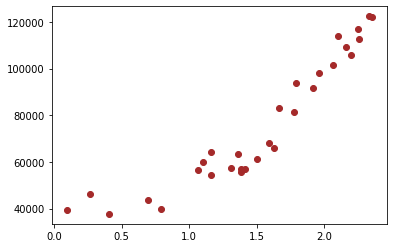

In [19]:
#Check the relation between Variable by Scatter Plot & Correlation Coefficient.
plt.scatter(x = np.log(sal['years']), y = sal['hike'], color = 'brown')
np.corrcoef(np.log(sal['years']),sal['hike'] ) #correlation

In [20]:
#Use OLS & fit model on data
model2= smf.ols('hike ~ np.log(years)',data = sal).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   hike   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Sat, 06 Aug 2022   Prob (F-statistic):           3.25e-13
Time:                        05:51:55   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(years)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

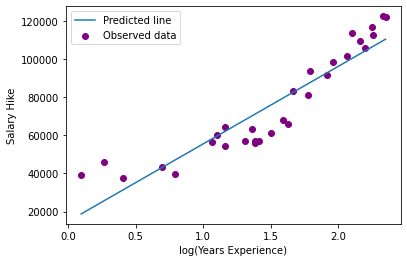

In [21]:
# Predict Regression Line for Model-2
pred2 = model2.predict(pd.DataFrame(sal['years']))
plt.scatter(x=np.log(sal["years"]),y="hike",data= sal, color = "purple" )
plt.plot(np.log(sal['years']),pred2)
plt.legend(['Predicted line', 'Observed data'])
plt.xlabel('log(Years Experience)')
plt.ylabel('Salary Hike')
plt.show()

In [22]:
# RMSE Error calculation for Model-2
res2 = sal.hike- pred2
res_sqr2 = res2 * res2
mse2 = np.mean(res_sqr2)
rmse2 = np.sqrt(mse2)
rmse2

10302.893706228302

Model-3 {Exponential Method}, y=log(hike), x=year

array([[1.        , 0.96538444],
       [0.96538444, 1.        ]])

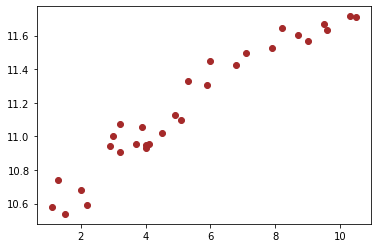

In [23]:
#Checking the relation between Variable by Scatter Plot & Correlation Coefficient.
plt.scatter(x = sal['years'], y= np.log(sal['hike']), color = 'brown') # Scatter Plot for checking relation.
np.corrcoef(sal['years'],np.log(sal['hike']) ) #correlatio

In [32]:
#Use OLS & fit model on data
import statsmodels.formula.api as smf
model3= smf.ols('np.log(hike) ~ years',data = sal).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           np.log(hike)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Sat, 06 Aug 2022   Prob (F-statistic):           7.03e-18
Time:                        06:11:43   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.5074      0.038    273.327      0.000      10.429      10.586
years          0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

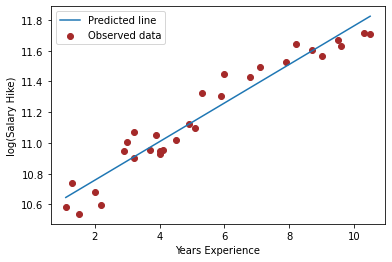

In [33]:
# Predict Regression Line for Model-3
pred3 = model3.predict(pd.DataFrame(sal['years']))
pred3_exp = np.exp(pred3)
plt.scatter(x =(sal['years']), y = np.log(sal['hike']), color = 'brown')
plt.plot(sal['years'],pred3)
plt.legend(['Predicted line', 'Observed data'])
plt.xlabel('Years Experience')
plt.ylabel('log(Salary Hike)')
plt.show()

In [34]:
#  RMSE Error calculation
res3 = sal.hike - pred3_exp
res_sqr3 = res3 * res3
mse3 = np.mean(res_sqr3)
rmse3 = np.sqrt(mse3)
rmse3

7213.235076620168

Model-4 Polynomial of Transformation of Degree 2 ( Quadratic) , y=ax^2+bx+c --> {x = years ; x^2 = (years)^2 ; y = hike}

In [27]:
#Use OLS & fit model on data
model4 = smf.ols('hike ~ years + I(years*years)', data = sal).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   hike   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     300.3
Date:                Sat, 06 Aug 2022   Prob (F-statistic):           3.59e-19
Time:                        05:57:40   Log-Likelihood:                -301.43
No. Observations:                  30   AIC:                             608.9
Df Residuals:                      27   BIC:                             613.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         2.621e+04   4554.674      5.756      0.000    1.69e+04    3.56e+04
years             9259.2839   1811.007      5.113      0.000    5543.405     1.3e+04
I(years * years)    16.3926    152.121      0.108      0.915    -295.734     328.520
==============================================================================
Omnibus:                        2.181   Durbin-Watson:                   1.649
Prob(Omnibus):                  0.336   Jarque-Bera (JB):                1.627
Skew:                           0.384   Prob(JB):                        0.443
Kurtosis:                       2.156   Cond. No.                         223.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
pred4 = model4.predict(pd.DataFrame(sal))
X = sal.iloc[:, 0:1].values

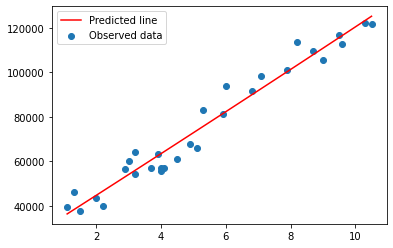

In [29]:
plt.scatter(sal.years,sal.hike)
plt.plot(X, pred4, color = 'red')
plt.legend(['Predicted line', 'Observed data'])
plt.show()

In [30]:
# Error calculation
res4 = sal.hike - pred4
res_sqr4 = res4 * res4
mse4 = np.mean(res_sqr4)
rmse4 = np.sqrt(mse4)
rmse4

5590.841479683286

In [31]:
# Choosing the best model using RMSE
data = {"MODEL":pd.Series(["SLR", "Log model", "Exp model", "Poly model"]), "RMSE":pd.Series([rmse1, rmse2, rmse3, rmse4])}
table_rmse = pd.DataFrame(data)
table_rmse

,MODEL,RMSE
0,SLR,5592.043609
1,Log model,10302.893706
2,Exp model,7213.235077
3,Poly model,5590.841480


In [35]:
#Our Best model is Base Model with No transfomation.( Vanilla Model)

 Best Model Selection from 4 Model tested Based on R , R^2 & RMSE Value

In [36]:
#BEST MODEL - Vanilla Model ( y=mx+c,No Tranformation)

#Train & Test your data on the Best model to check the performance of model on test data

In [37]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(sal, test_size = 0.25,random_state=6)

finalmodel = smf.ols('hike ~ years', data = train).fit()
finalmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   hike   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     466.2
Date:                Sat, 06 Aug 2022   Prob (F-statistic):           2.49e-15
Time:                        06:18:01   Log-Likelihood:                -220.21
No. Observations:                  22   AIC:                             444.4
Df Residuals:                      20   BIC:                             446.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.308e+04   2703.085      8.537      0.000    1.74e+04    2.87e+04
years       9743.7053    451.284     21.591      0.000    8802.343    1.07e+04
==============================================================================
Omnibus:                        2.296   Durbin-Watson:                   1.846
Prob(Omnibus):                  0.317   Jarque-Bera (JB):                1.918
Skew:                           0.678   Prob(JB):                        0.383
Kurtosis:                       2.494   Cond. No.                         13.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
# Prediction on train data
train_pred = finalmodel.predict(pd.DataFrame(train))
train_pred 

22    100052.488857
18     80565.078289
2      37692.775039
8      54257.074022
21     92257.524629
4      44513.368738
14     66923.890891
12     62052.038249
26    115642.417311
23    102975.600442
24    107847.453084
11     62052.038249
1      35744.033982
16     72770.114062
25    110770.564669
15     70821.373005
13     63026.408778
29    125386.122595
20     89334.413044
3      42564.627681
9      59128.926664
10     61077.667721
dtype: float64

In [39]:
# Model Evaluation on train data
train_res = train.hike - train_pred
train_sqrs = train_res * train_res
train_mse = np.mean(train_sqrs)
train_rmse = np.sqrt(train_mse)
train_rmse

5380.95524092812

In [40]:
# Predict on test data
test_pred = finalmodel.predict(pd.DataFrame(test))
test_pred

0      33795.292926
28    123437.381538
27    116616.787839
6      52308.332965
17     74718.855118
19     81539.448817
7      54257.074022
5      51333.962437
dtype: float64

In [41]:
# Model Evaluation on Test data
test_res = test.hike - test_pred
test_sqrs = test_res * test_res
test_mse = np.mean(test_sqrs)
test_rmse = np.sqrt(test_mse)
test_rmse

6719.7951887105255

Since the RMSE value of Train & Test data is very Close, it can be Inferred Model will perform well in real life scenario with Unknown Data

We can predict the Salary Hike with higher accuracy based on Year’s of Experience data

Final R^2 Value = 95.9%